# Se analizan los top n delitos por estado y los estados con narcotráfico

In [1]:
# Manejar rutas
from pathlib import Path

# Cargar y transformar datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data_path = Path('../data')
tidy_path = data_path / 'tidy'

In [3]:
semaforo = pd.read_parquet(tidy_path / 'delitos_semaforo.parquet')

In [4]:
semaforo.head()

,anio,clave_ent,entidad,clave_municipio,municipio,bien_afectado,tipo_delito,subtipo_delito,delito_semaforo,modalidad,...,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,total
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con arma de fuego,...,1,0,1,1,0,2,1,0,1,10
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con arma blanca,...,0,0,1,0,1,0,0,0,0,4
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con otro elemento,...,1,3,2,0,1,2,0,0,0,10
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,No especificado,...,1,0,0,0,0,0,0,0,0,2
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,Lesiones,Con arma de fuego,...,1,1,1,3,2,1,3,2,2,23


# Ideas:
- Centrarse en la violencia familiar y en lesiones

In [5]:
import ipywidgets as widgets

def graficar_topn_delitos(anio: int=2022, n: int=1):
    vista1 = semaforo[semaforo['anio'] == anio]
    print(vista1.shape)
    vista1 = vista1.groupby(['entidad', 'delito_semaforo'])['total'].sum().reset_index()
    # Obtener top n delitos con más ocurrencia por entidad
    vista1 = vista1.groupby('entidad').apply(lambda x: x.nlargest(n, 'total')).reset_index(drop=True)
    vista1.sort_values(by='total', ascending=False, inplace=True)
    fig = px.bar(vista1, x='total', y='entidad', color='delito_semaforo', barmode='stack', width=1200, height=700)
    fig.update_layout(yaxis_categoryorder = 'total ascending')

    # Mostrar el gráfico
    fig.show()

anios = semaforo["anio"].unique()
ns = [1,2,3,4]
widgets.interact(graficar_topn_delitos, anio=anios, n=ns)

interactive(children=(Dropdown(description='anio', index=7, options=(2015, 2016, 2017, 2018, 2019, 2020, 2021,…

<function __main__.graficar_topn_delitos(anio: int = 2022, n: int = 1)>

Parece ser que la violencia familiar es el delito que predomina en la mayoria de estados.  
Se observa que tambien 'Lesiones' tiene presencia. Intentemos observar que modalidades son las que más predominan en Lesiones.

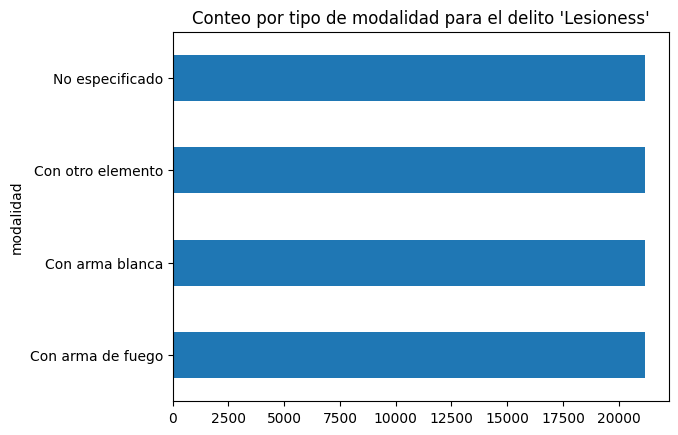

In [6]:
semaforo.query("delito_semaforo == 'Lesiones'")['modalidad'].value_counts().plot(kind='barh')
plt.title("Conteo por tipo de modalidad para el delito 'Lesioness'")
plt.show()

Se puede observar que los datos presentan una distribución uniforme, no hay que confundirse e interpretar esto como que han ocurrido las mismas instancias de delito con la misma modalidad. Este gráfico más bien muestra que para cada año, en cada municipio/estado hay el mismo número de delito registrado con su modalidad, pues así fue la forma de capturarse, aunque algunas veces pudiera tener conteo cero en todos los meses. Para visualizar cómo se distribuyen realmente las modalidades tenemos que multiplicar la columna total por la modalidad.  

In [13]:
sample = semaforo.head(4)
sample

,anio,clave_ent,entidad,clave_municipio,municipio,bien_afectado,tipo_delito,subtipo_delito,delito_semaforo,modalidad,...,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,total
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con arma de fuego,...,1,0,1,1,0,2,1,0,1,10
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con arma blanca,...,0,0,1,0,1,0,0,0,0,4
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con otro elemento,...,1,3,2,0,1,2,0,0,0,10
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,No especificado,...,1,0,0,0,0,0,0,0,0,2


Para hacer esto, agrupemos por `modalidad` y luego sumemos la columna `total`.

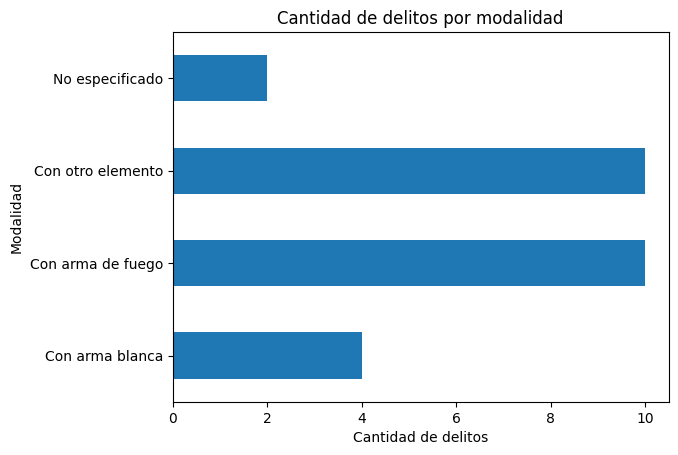

In [19]:
sample.groupby('modalidad')['total'].sum().plot(kind='barh')
plt.title("Cantidad de delitos por modalidad")
plt.ylabel("Modalidad")
plt.xlabel("Cantidad de delitos")
plt.show()

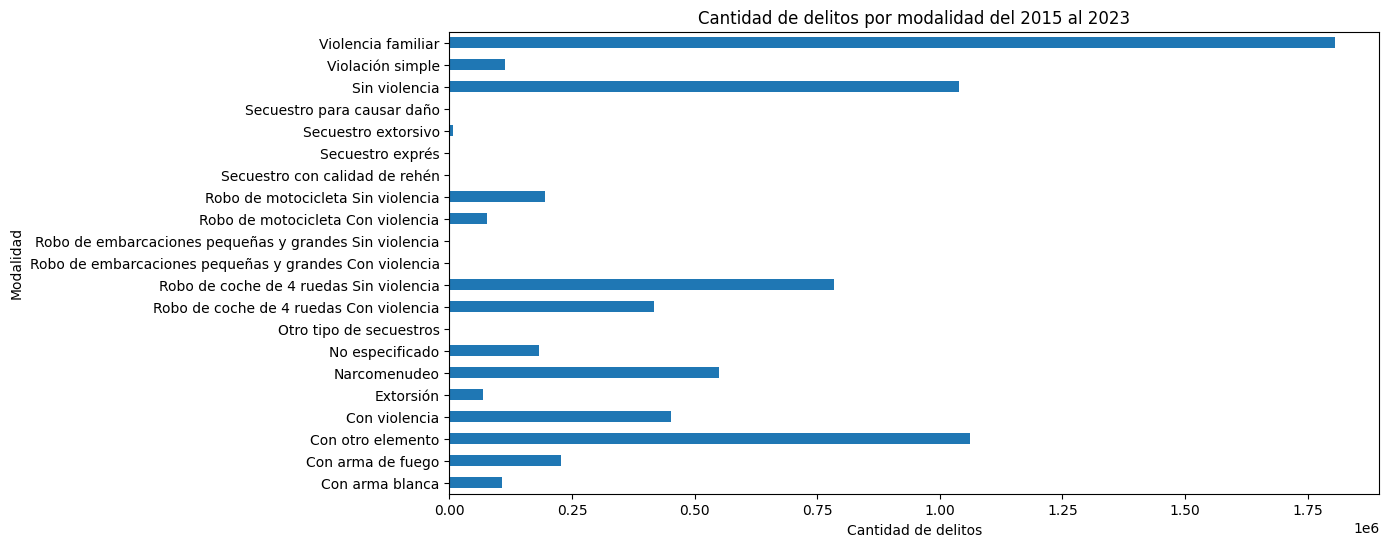

In [27]:
plt.figure(figsize=(12,6))
semaforo.groupby('modalidad')['total'].sum().plot(kind='barh')
plt.title("Cantidad de delitos por modalidad del 2015 al 2023")
plt.ylabel("Modalidad")
plt.xlabel("Cantidad de delitos")
plt.show()

Ahora veamos esta distribución por delito

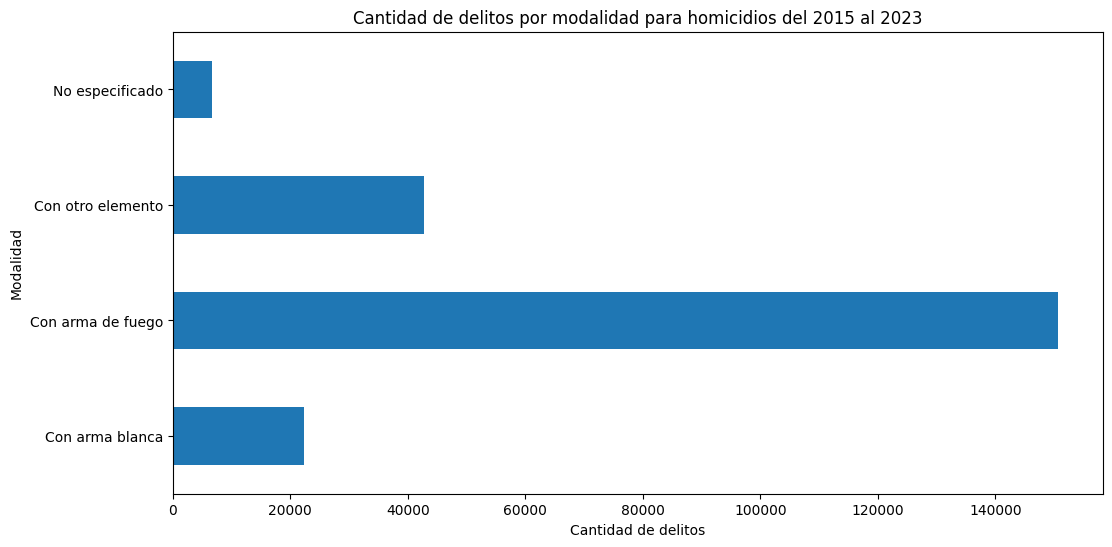

In [32]:
plt.figure(figsize=(12,6))
semaforo.query('delito_semaforo == "Homicidios"').groupby('modalidad')['total'].sum().plot(kind='barh')
plt.title("Cantidad de delitos por modalidad para homicidios del 2015 al 2023")
plt.ylabel("Modalidad")
plt.xlabel("Cantidad de delitos")
plt.show()

Se puede observar que la mayoría de modalidades para este delito se han cometido con ármas de fuego, lo que nos hablaría de una población altamente armada. Otra cosa interesante a notar es que la modalidad "Con otro elemento" es bastante ambigua, y al ser la segunda categoría con mayor conteo deja un poco ambiguo la forma en la que se están cometiendo una gran cantidad de homicidios dolosos.

# Evolución de un delito en el tiempo
Visualizemos algunas series de tiempo para observar cómo han ido evolucionando los delitos en los últimos 8 años.

## De meses en columnas a una serie de tiempo
Primeramente convirtamos el formato del dataframe a uno con una entrada por mes con el delito cometido

In [33]:
cols_meses = semaforo.columns[10:-1]

Agrupamos por las columnas de nuestro interés

In [34]:
s = semaforo.groupby(['anio','entidad', 'delito_semaforo'])[cols_meses].sum().reset_index()
s

,anio,entidad,delito_semaforo,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,2015,Aguascalientes,Extorsión,2,4,1,5,7,2,1,3,2,6,4,2
1,2015,Aguascalientes,Feminicidio,0,0,0,0,0,0,0,0,0,0,0,0
2,2015,Aguascalientes,Homicidios,6,1,4,4,4,4,2,3,4,2,2,2
3,2015,Aguascalientes,Lesiones,172,194,205,227,210,216,201,235,173,169,144,143
4,2015,Aguascalientes,Narcomenudeo,37,50,43,44,53,53,51,81,45,58,45,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,2023,Zacatecas,Robo a negocio,21,33,20,18,25,21,19,32,38,0,0,0
3164,2023,Zacatecas,Robo a vehículo,179,145,203,164,151,160,156,119,171,0,0,0
3165,2023,Zacatecas,Secuestros,1,1,1,0,0,1,1,0,0,0,0,0
3166,2023,Zacatecas,Violación,7,13,17,15,11,17,12,14,16,0,0,0


In [37]:
df_melted = s.melt(
    id_vars=['anio', 'entidad', 'delito_semaforo'],
    value_vars=cols_meses,
    var_name='mes',
    value_name='conteo'
)

In [38]:
df_melted

,anio,entidad,delito_semaforo,mes,conteo
0,2015,Aguascalientes,Extorsión,enero,2
1,2015,Aguascalientes,Feminicidio,enero,0
2,2015,Aguascalientes,Homicidios,enero,6
3,2015,Aguascalientes,Lesiones,enero,172
4,2015,Aguascalientes,Narcomenudeo,enero,37
...,...,...,...,...,...
38011,2023,Zacatecas,Robo a negocio,diciembre,0
38012,2023,Zacatecas,Robo a vehículo,diciembre,0
38013,2023,Zacatecas,Secuestros,diciembre,0
38014,2023,Zacatecas,Violación,diciembre,0


### Crear una columna de datatime
Para esto es necesario extraer el año y mapear el nombre del mes a un número el cual será identificado por pandas como fecha.

In [39]:
meses = df_melted['mes'].unique()
meses

array(['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio',
       'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
      dtype=object)

In [40]:
meses_mapeo = {
    meses[i-1] : f'{i:02}' for i in range(1, len(meses)+1)
}
meses_mapeo

{'enero': '01',
 'febrero': '02',
 'marzo': '03',
 'abril': '04',
 'mayo': '05',
 'junio': '06',
 'julio': '07',
 'agosto': '08',
 'septiembre': '09',
 'octubre': '10',
 'noviembre': '11',
 'diciembre': '12'}

In [41]:
df = df_melted.copy()
df['fecha'] = df.apply(
    lambda x: pd.to_datetime(f'{x.anio}-{meses_mapeo[x.mes]}',format="%Y-%m"),
    axis=1)

In [42]:
df.head()

,anio,entidad,delito_semaforo,mes,conteo,fecha
0,2015,Aguascalientes,Extorsión,enero,2,2015-01-01
1,2015,Aguascalientes,Feminicidio,enero,0,2015-01-01
2,2015,Aguascalientes,Homicidios,enero,6,2015-01-01
3,2015,Aguascalientes,Lesiones,enero,172,2015-01-01
4,2015,Aguascalientes,Narcomenudeo,enero,37,2015-01-01


Ahora podemos deshacernos de las columnas utilizadas para crear el datetime: 'anio' y 'mes'. Además de esto cambiemos el orden de las columnas a algo más convencional.

In [43]:
df.drop(columns=['anio', 'mes'], inplace=True)
df.rename(columns={'delito_semaforo':'delito', 'entidad':'estado'}, inplace=True)
df = df[['fecha', 'estado', 'delito','conteo']]
df = df.set_index('fecha')
df = df.sort_index()
df

,estado,delito,conteo
fecha,,,
2015-01-01,Aguascalientes,Extorsión,2
2015-01-01,Querétaro,Secuestros,1
2015-01-01,Querétaro,Robo a vehículo,313
2015-01-01,Querétaro,Robo a negocio,177
2015-01-01,Querétaro,Robo a casa,165
...,...,...,...
2023-12-01,Guanajuato,Homicidios,0
2023-12-01,Guanajuato,Feminicidio,0
2023-12-01,Guanajuato,Extorsión,0


## Conteo de delitos a nivel nacional por mes

Creemos otro DataFrame sumando las cantidades de los delitos, ignorando su estado.

In [44]:
delitos_nacional = df.groupby(['fecha', 'delito'])['conteo'].sum().reset_index().set_index('fecha')
delitos_nacional

,delito,conteo
fecha,,
2015-01-01,Extorsión,432
2015-01-01,Feminicidio,32
2015-01-01,Homicidios,1197
2015-01-01,Lesiones,10358
2015-01-01,Narcomenudeo,2470
...,...,...
2023-12-01,Robo a negocio,0
2023-12-01,Robo a vehículo,0
2023-12-01,Secuestros,0


## Evolución de un delito por estado
Podemos utilizar el siguiente widget para observar el comportamiento de un delito a lo largo de estos años y comparar distintos estados

In [47]:
import ipywidgets as widgets

def graficar_delito_tiempo(delito):
    vista = df[df['delito'] == delito]
    fig = px.line(vista, x=vista.index, y='conteo', color='estado',
                  title=f'Gráfico de delitos de {delito} en el tiempo')
    fig.update_traces(visible='legendonly')
    fig.show()

delitos = df['delito'].unique()
widgets.interact(graficar_delito_tiempo, delito=delitos)

interactive(children=(Dropdown(description='delito', options=('Extorsión', 'Secuestros', 'Robo a vehículo', 'R…

<function __main__.graficar_delito_tiempo(delito)>

# Estados con más narcotráfico y sus delitos
Se intenta responder a la pregunta: ¿cómo afecta el narcotráfico a los estados en términos de delitos? Por ejemplo, seria esperable que en estos estados hubiera un mayor número de Homicidios, Extorsiones, Secuestros, Lesiones, Robo de Vehículo, etc.
Info basada en esta entrada de Aristegui noticias: [El mapa del narcotráfico en México: 12 cárteles en guerra por el territorio](https://aristeguinoticias.com/1606/mexico/el-mapa-del-narcotrafico-en-mexico-12-carteles-en-guerra-por-el-territorio/)

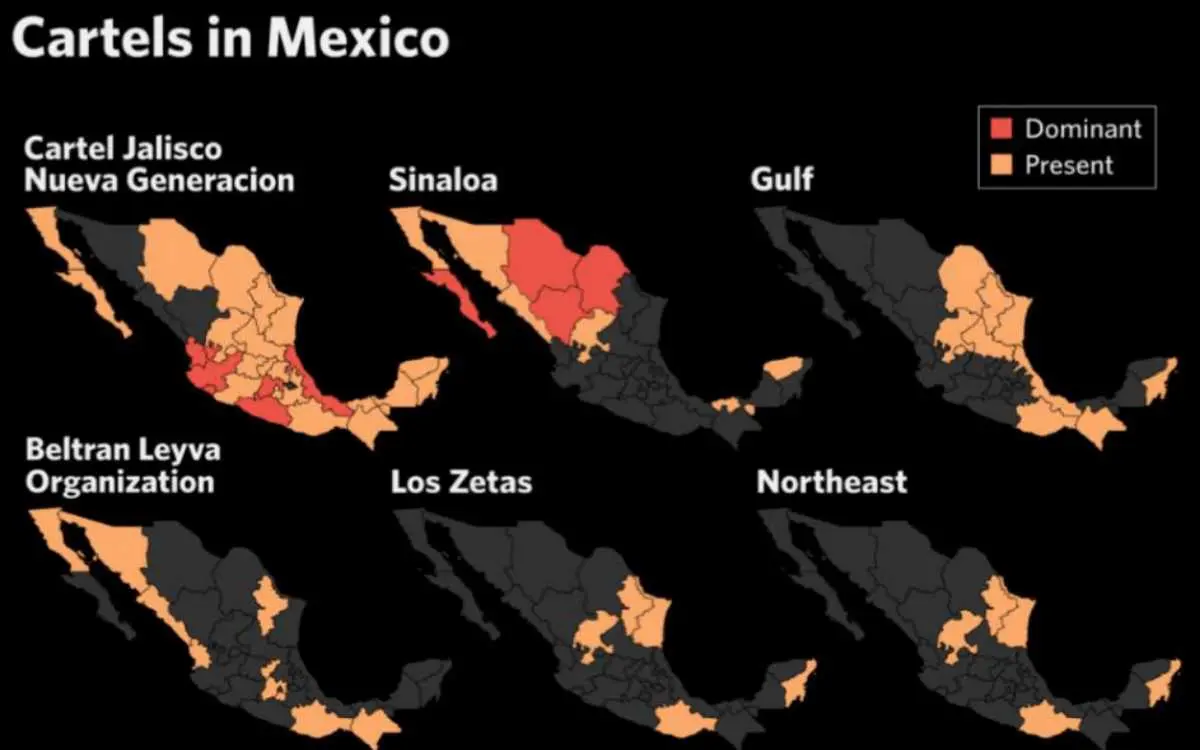

In [48]:
df["estado"].unique()

array(['Aguascalientes', 'Querétaro', 'Puebla', 'Quintana Roo',
       'San Luis Potosí', 'Oaxaca', 'Nayarit', 'México', 'Nuevo León',
       'Sinaloa', 'Veracruz de Ignacio de la Llave', 'Tlaxcala',
       'Yucatán', 'Zacatecas', 'Tamaulipas', 'Sonora', 'Tabasco',
       'Morelos', 'Chihuahua', 'Chiapas', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Campeche', 'Baja California',
       'Baja California Sur', 'Colima', 'Jalisco', 'Hidalgo',
       'Michoacán de Ocampo', 'Guerrero', 'Durango', 'Guanajuato'],
      dtype=object)

In [49]:
# Lista de estados con narcotráfico
estados_narco = [
    'Baja California',
    'Baja California Sur',
    'Nayarit',
    'Jalisco',
    'Colima ',
    'Querétaro',
    'Durango ',
    'Sinaloa',
    'Sonora',
    'Zacatecas',
    'Michoacán de Ocampo',
    'México',
    'Morelos',
    'Oaxaca',
    'Veracruz',
    'Quintana Roo',
    'Tabasco',
    'San Luis Potos',
    'Nuevo León',
    'Tamaulipas ',
    'Coahuila de Zaragoza',
]
print(len(estados_narco))

21


In [50]:
semaforo.head()

,anio,clave_ent,entidad,clave_municipio,municipio,bien_afectado,tipo_delito,subtipo_delito,delito_semaforo,modalidad,...,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,total
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con arma de fuego,...,1,0,1,1,0,2,1,0,1,10
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con arma blanca,...,0,0,1,0,1,0,0,0,0,4
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,Con otro elemento,...,1,3,2,0,1,2,0,0,0,10
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Homicidios,No especificado,...,1,0,0,0,0,0,0,0,0,2
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Lesiones,Lesiones dolosas,Lesiones,Con arma de fuego,...,1,1,1,3,2,1,3,2,2,23


In [51]:
semaforo_n = semaforo[semaforo['entidad'].isin(estados_narco)]

# Top n tipo de delitos cometidos en estados con más narcotráfico

In [54]:
import ipywidgets as widgets

def graficar_topn_delitos_narcos(anio: int=2022, n: int=1):
    vista1 = semaforo_n[semaforo_n['anio'] == anio]
    print(vista1.shape)
    vista1 = vista1.groupby(['entidad', 'delito_semaforo'])['total'].sum().reset_index()
    # Obtener top n delitos con más ocurrencia por entidad
    vista1 = vista1.groupby('entidad').apply(lambda x: x.nlargest(n, 'total')).reset_index(drop=True)
    vista1.sort_values(by='total', ascending=False, inplace=True)
    fig = px.bar(vista1, x='total', y='entidad', color='delito_semaforo', barmode='stack', width=1200, height=700)
    fig.update_layout(yaxis_categoryorder = 'total ascending')

    # Mostrar el gráfico
    fig.show()

anios = semaforo_n["anio"].unique()
ns = [1,2,3,4]
widgets.interact(graficar_topn_delitos_narcos, anio=anios, n=ns)

interactive(children=(Dropdown(description='anio', index=7, options=(2015, 2016, 2017, 2018, 2019, 2020, 2021,…

<function __main__.graficar_topn_delitos_narcos(anio: int = 2022, n: int = 1)>

Obviando la violencia familiar, ya que se sabe que es un problema del país en generál, podemos observar que en efecto hay un fran número de lesiones, robos y homicidios en estos estados.

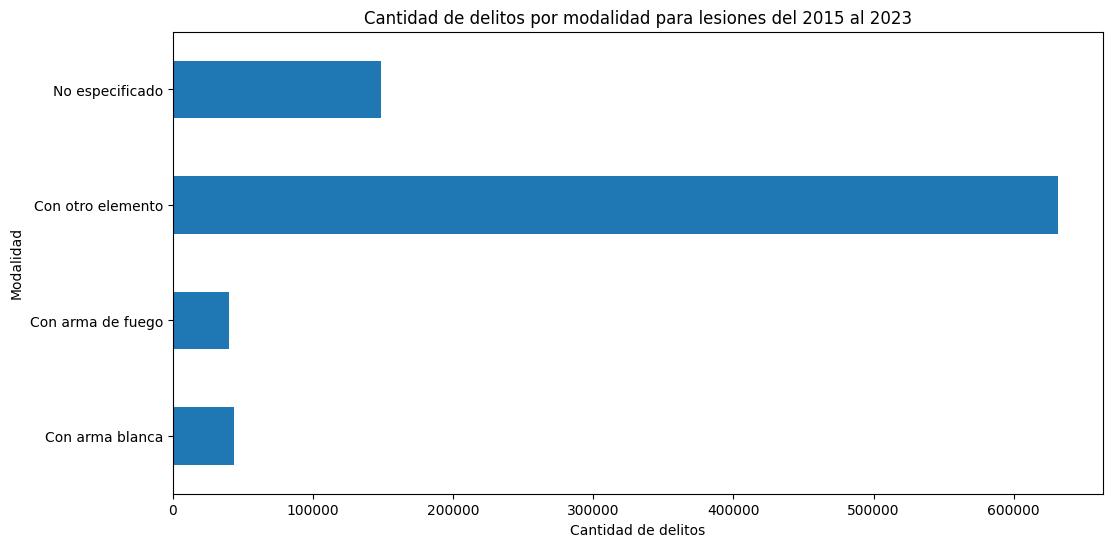

In [53]:
plt.figure(figsize=(12,6))
semaforo_n.query('delito_semaforo == "Lesiones"').groupby('modalidad')['total'].sum().plot(kind='barh')
plt.title("Cantidad de delitos por modalidad para lesiones del 2015 al 2023")
plt.ylabel("Modalidad")
plt.xlabel("Cantidad de delitos")
plt.show()

De igual forma queda ambiguo cómo se estan llevando a cabo estos delitos.

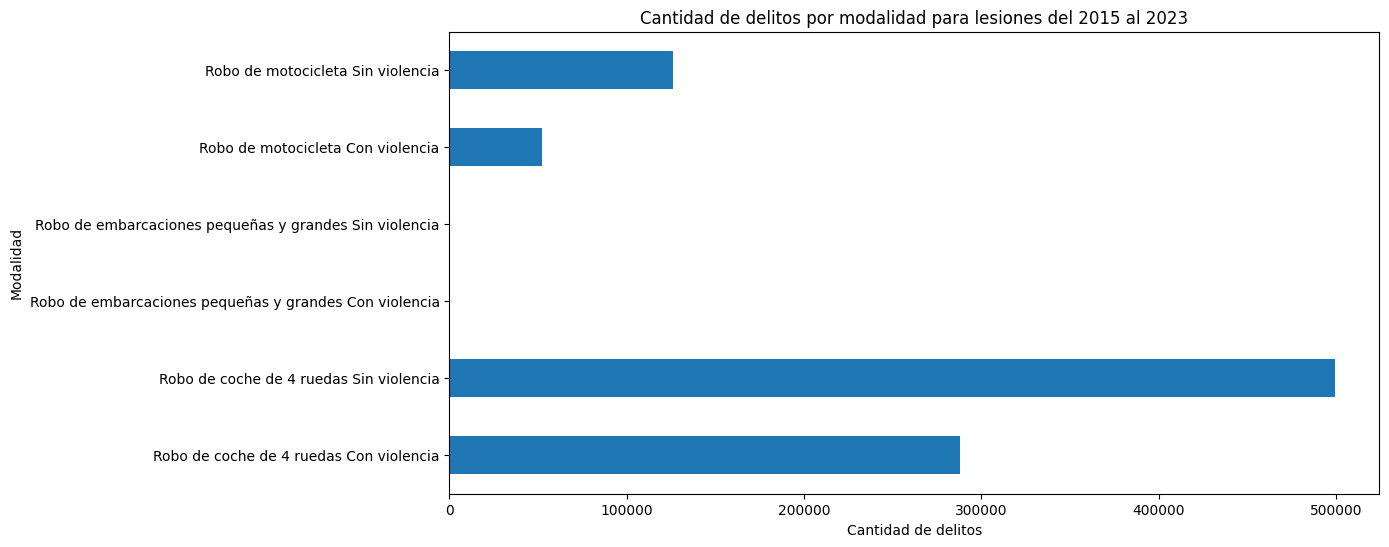

In [55]:
plt.figure(figsize=(12,6))
semaforo_n.query('delito_semaforo == "Robo a vehículo"').groupby('modalidad')['total'].sum().plot(kind='barh')
plt.title("Cantidad de delitos por modalidad para Robo a vehículo del 2015 al 2023")
plt.ylabel("Modalidad")
plt.xlabel("Cantidad de delitos")
plt.show()